In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [2]:
name = 'beta Pictoris'

# Let's have a look at the Target Pixel Files (TPF) of beta Pic through the four sectors

SearchResult containing 4 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_tp.fits Target pixel files      0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_tp.fits Target pixel files      0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_tp.fits Target pixel files      0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_tp.fits Target pixel files      0.0


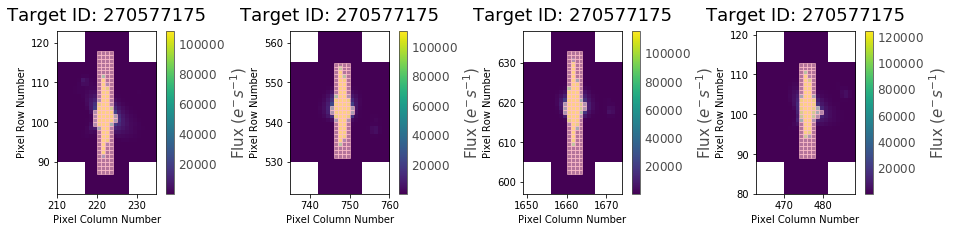

In [3]:
search_result = lk.search_targetpixelfile(name)
print(search_result)

tpfs = search_result.download_all()

fig, axs = plt.subplots(1, 4, figsize=(16, 3))
for idx, tpf in enumerate(tpfs):
    aper = tpf.pipeline_mask
    tpf.plot(aperture_mask=aper, ax=axs[idx])

# And now at the Light Curve of beta Pic through the four sectors

SearchResult containing 4 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_lc.fits Light curves      0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_lc.fits Light curves      0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_lc.fits Light curves      0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_lc.fits Light curves      0.0


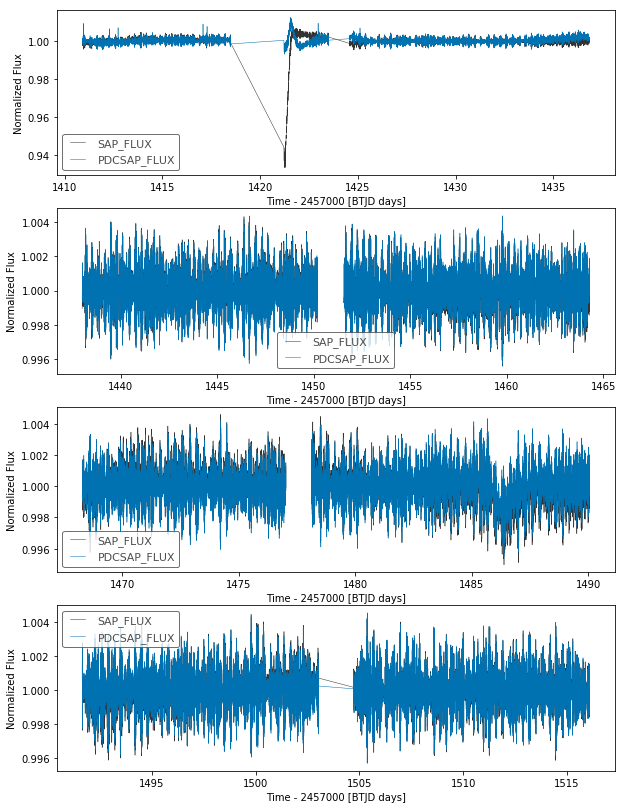

In [5]:
search_results = lk.search_lightcurvefile(name)
print(search_results)

lcs = search_results.download_all()
fig, axs = plt.subplots(4, 1, figsize=(10, 14))
for idx, tpf in enumerate(tpfs):
    lcs[idx].plot(ax=axs[idx]);

We see the instrumental anomaly in the first plot (Sector 4) betwen BTJD 1421 and BTJD 1424 - which was removed in the analysis. We also already see the dip in the third plot (Sector 6). The two smaller dips in Sector 5 (second plot) are not visible yet, as the pulsations are too strong.  

## The following 4 fields show some basic informations on the observations of beta Pic in those four sectors - like the CCD which was used in order to observe the star.

In [36]:
tpfs[0].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           4
            ccd                                                                                                                                                           1
         column                                                                                                                                                         210
            row                                                                                                                             

In [37]:
tpfs[1].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           4
         column                                                                                                                                                         735
            row                                                                                                                             

In [38]:
tpfs[2].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           3
         column                                                                                                                                                        1649
            row                                                                                                                             

In [39]:
tpfs[3].show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           3
         column                                                                                                                                                         463
            row                                                                                                                             

# A zoom in the PDCSAP light curve of the already mentioned anomaly in Sector 4

(1420, 1425)

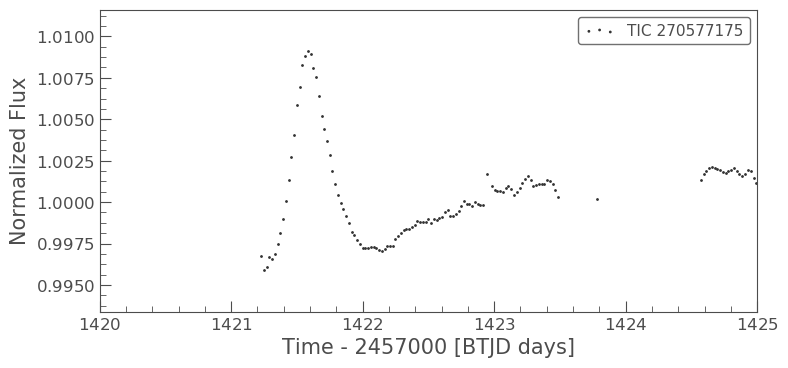

In [31]:
lc = lcs[0].PDCSAP_FLUX.bin(15).normalize()
for i in range(1,4):
    lc = lc.append(lcs[i].PDCSAP_FLUX.bin(15).normalize())
lc.scatter();  
#plt.ylim(0.995, 1.005)

plt.xlim(1420, 1425)

# A comparison between the SAP (lower plot) and the PDCSAP (upper plot) light curve (lc) of the 4 sectors binned to 30 minutes (= binning 15 two-minutes-observations). We see that the big dip is clearly visible in both light curves. We also see that in the PDCSAP lc the end of sector 4 exhibits a brightening (at about BTJD 1435), which is not visible in the SAP lc. Thus, this is created by the reduction. The two smaller dips in Sector 5 are barely visible.

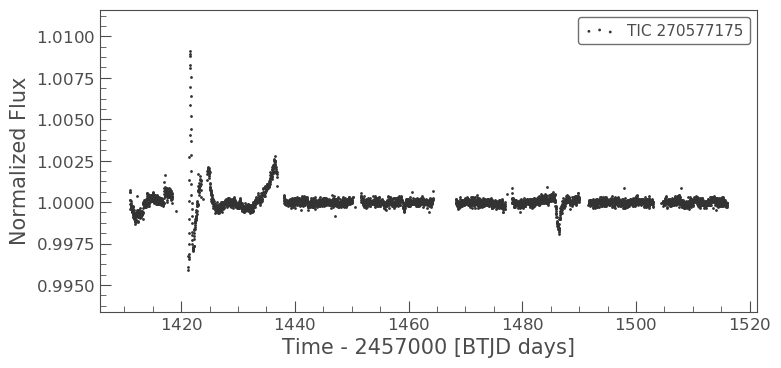

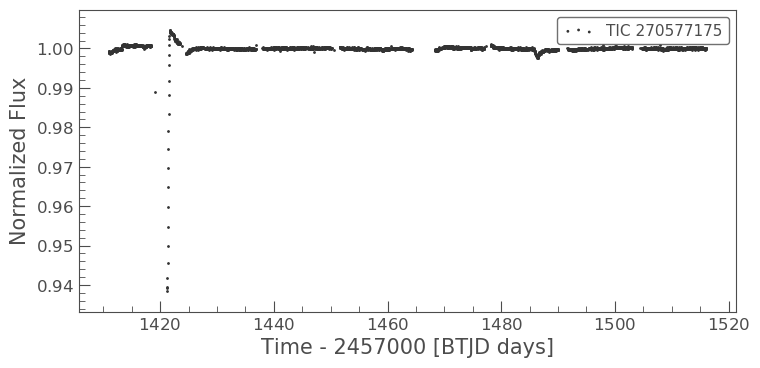

In [7]:
lc = lcs[0].PDCSAP_FLUX.bin(15).normalize()
for i in range(1,4):
    lc = lc.append(lcs[i].PDCSAP_FLUX.bin(15).normalize())
lc.scatter();  
lc = lcs[0].SAP_FLUX.bin(15).normalize()
for i in range(1,4):
    lc = lc.append(lcs[i].SAP_FLUX.bin(15).normalize())
lc.scatter(); 

# Let's have a look at the movement of beta Pic during the observations in each sector.

Text(0.5, 1.0, 'Target Motion')

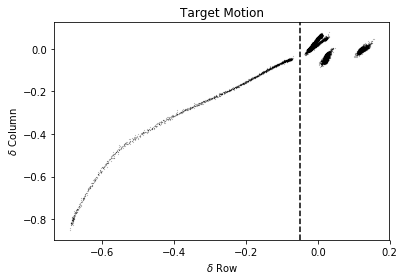

In [8]:
import numpy as np
r, c = tpfs[0].estimate_centroids()
r -= np.nanmedian(r)
c -= np.nanmedian(c)
plt.scatter(r, c, s=0.01, c='k')
#plt.scatter(r[mask_centroid], c[mask_centroid], s=0.01, c='r')
plt.axvline(-0.05, c='k', ls='--')
#plt.axhline(-0.05, c='k', ls='--')
plt.xlabel('$\delta$ Row')
plt.ylabel('$\delta$ Column')
plt.title('Target Motion')
#plt.text(-0.6, -0.02, 'Cut Off')

Left the dashed line is the delta position of beta Pic during the anomaly of Sector 4.

Text(0.5, 1.0, 'Target Motion')

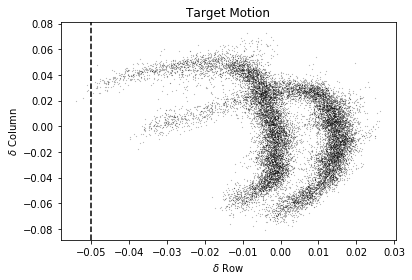

In [68]:
import numpy as np
r, c = tpfs[3].estimate_centroids()
r -= np.nanmedian(r)
c -= np.nanmedian(c)
plt.scatter(r, c, s=0.01, c='k')
#plt.scatter(r[mask_centroid], c[mask_centroid], s=0.01, c='r')
#plt.axvline(-0.05, c='k', ls='--')
#plt.axhline(-0.05, c='k', ls='--')
plt.xlabel('$\delta$ Row')
plt.ylabel('$\delta$ Column')
plt.title('Target Motion')
#plt.text(-0.6, -0.02, 'Cut Off')

In [9]:
lc0_PS = lcs[0].PDCSAP_FLUX
lc1_PS = lcs[1].PDCSAP_FLUX
lc2_PS = lcs[2].PDCSAP_FLUX
lc3_PS = lcs[3].PDCSAP_FLUX

In [10]:
mask0_quality = lc0_PS.quality == 0
mask1_quality = lc1_PS.quality == 0
mask2_quality = lc2_PS.quality == 0
mask3_quality = lc3_PS.quality == 0

In [11]:
mask0_centroid = r > -0.05

In [12]:
mask0 = mask0_quality & mask0_centroid 
mask1 = mask1_quality
mask2 = mask2_quality
mask3 = mask3_quality

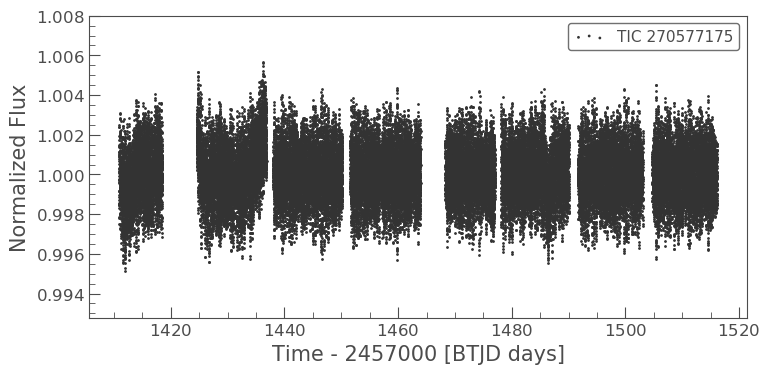

In [13]:
lc_PS = lc0_PS[mask0].normalize()
lc_PS = lc_PS.append(lc1_PS[mask1].normalize())
lc_PS = lc_PS.append(lc2_PS[mask2].normalize())
lc_PS = lc_PS.append(lc3_PS[mask3].normalize())

lc_PS.scatter();

# The same but with SAP_FLUX

In [14]:
lc0_S = lcs[0].SAP_FLUX
lc1_S = lcs[1].SAP_FLUX
lc2_S = lcs[2].SAP_FLUX
lc3_S = lcs[3].SAP_FLUX

In [15]:
mask0_quality = lc0_S.quality == 0
mask1_quality = lc1_S.quality == 0
mask2_quality = lc2_S.quality == 0
mask3_quality = lc3_S.quality == 0

In [16]:
mask0_centroid = r > -0.05

In [17]:
mask0 = mask0_quality & mask0_centroid 
mask1 = mask1_quality
mask2 = mask2_quality
mask3 = mask3_quality

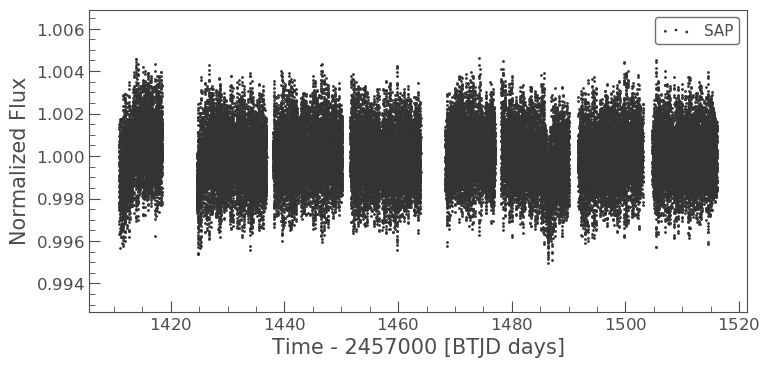

In [18]:
lc_S = lc0_S[mask0].normalize()
lc_S = lc_S.append(lc1_S[mask1].normalize())
lc_S = lc_S.append(lc2_S[mask2].normalize())
lc_S = lc_S.append(lc3_S[mask3].normalize())

lc_S.scatter(label= 'SAP');  

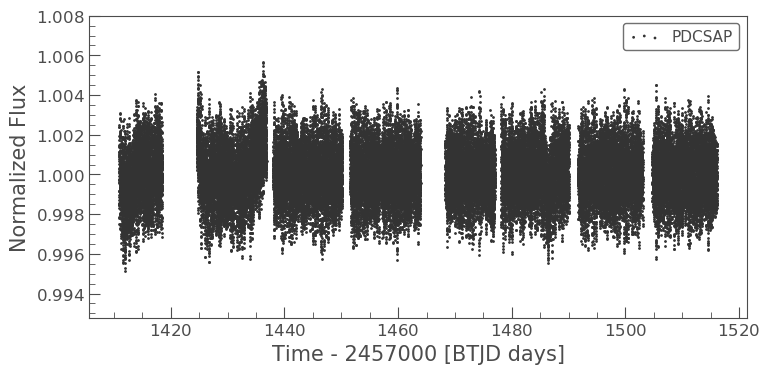

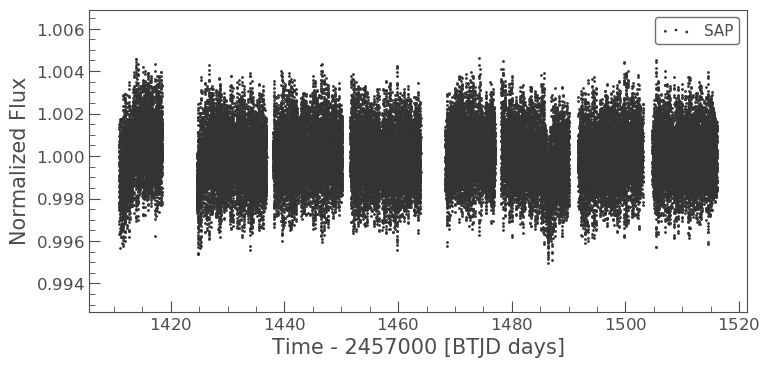

In [19]:
lc_PS.scatter(label= 'PDCSAP');
lc_S.scatter(label= 'SAP');  

# The light curves of beta Pic binned to 30 mins but w/o the anomaly in Sec 4.

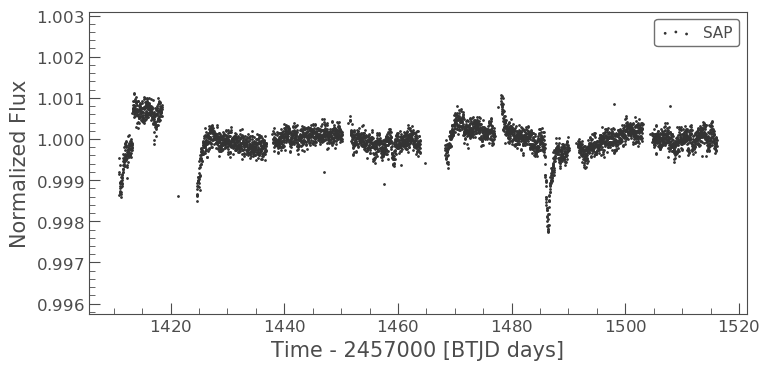

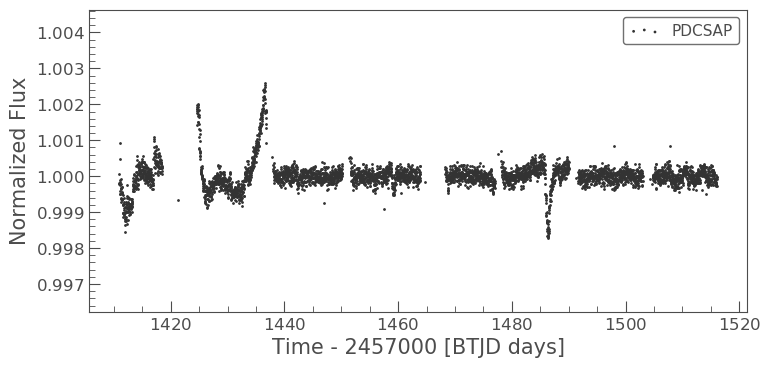

In [21]:
lc_S.bin(15).scatter(label= 'SAP'); 
lc_PS.bin(15).scatter(label= 'PDCSAP'); 

In [258]:
sectors = [1410.9, 1437.8, 1465.2, 1491.6]

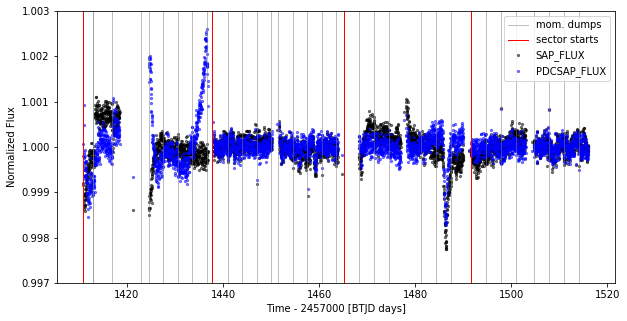

In [264]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

lc_S.bin(15).scatter(ax = axs, label = 'SAP_FLUX', alpha = 0.5, s=5, c='k');
lc_PS.bin(15).scatter(ax = axs, label = 'PDCSAP_FLUX', alpha = 0.5, s=5, c='b');

axs.axvline(mom_dumps0[0], linewidth=1, color='grey', linestyle='-', alpha=0.5, label='mom. dumps') 
axs.axvline(sectors[0], linewidth=1, color='red', linestyle='-', alpha=1, label='sector starts') 

[axs.axvline(_x, linewidth=1, color='grey', linestyle='-', alpha=0.5) for _x in mom_dumps0]
[axs.axvline(_x, linewidth=1, color='grey', linestyle='-', alpha=0.5) for _x in mom_dumps1]
[axs.axvline(_x, linewidth=1, color='grey', linestyle='-', alpha=0.5) for _x in mom_dumps2]
[axs.axvline(_x, linewidth=1, color='grey', linestyle='-', alpha=0.5) for _x in mom_dumps3]

[axs.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]


plt.legend()

axs.set_ylim(0.997, 1.003)
plt.show()

fig.savefig('betaPic_lc4567.png', bbox_inches='tight')

In [2]:
def total0(first, second):
    tmp = (second -1)/(2.85 - 1)
    return first + tmp
    
def total1(first, second):
    tmp = (second -1)/(3.55 - 1)
    return first + tmp

def total2(first, second):
    tmp = (second -1)/(3.55 - 1)
    return first + tmp

def total3(first, second):
    tmp = (second -1)/(3.40 - 1)
    return first + tmp

mom_dumps0 = [total0(1412, 2.75), total0(1416, 2.75), total0(1422, 2.75), total0(1424, 2.00), 
              total0(1427, 2.05), total0(1430, 2.05), total0(1433, 2.05), total0(1436, 2.05)] 
mom_dumps1 = [total1(1441, 1.05), total1(1444, 1.05), total1(1447, 1.05), total1(1450, 1.05), 
              total1(1451, 2.35), total1(1454, 2.50), total1(1457, 2.50), total1(1460, 2.50), total1(1463, 2.50)] 
mom_dumps2 = [total2(1468, 1.95), total2(1471, 2.30), total2(1474, 2.55), total2(1481, 1.70), 
              total2(1484, 2.00), total2(1487, 2.35)] 
mom_dumps3 = [total3(1491, 2.50), total3(1494, 2.90), total3(1497, 3.20), total3(1501, 1.15), 
              total3(1504, 2.65), total3(1507, 3.00), total3(1510, 3.35), total3(1514, 1.25)] 

In [3]:
mom_dumps0

[1412.945945945946,
 1416.945945945946,
 1422.945945945946,
 1424.5405405405406,
 1427.5675675675675,
 1430.5675675675675,
 1433.5675675675675,
 1436.5675675675675]

In [167]:
sum(tpfs[0].quality==32)

0

In [168]:
ffi0 = lk.search_tesscut('beta Pictoris', sector=4).download(cutout_size=(31,13))

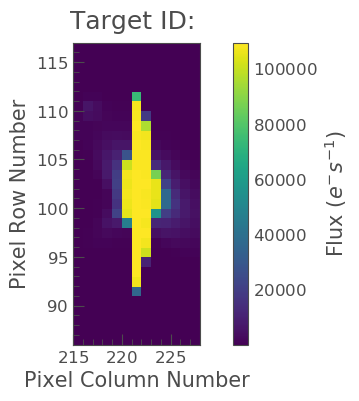

In [173]:
ffi0.plot();

In [175]:
sum(ffi0.quality)

0

In [179]:
lc_PS.time

array([1410.90352425, 1410.90491317, 1410.90630209, ..., 1516.08417223,
       1516.08556108, 1516.08694993])

In [180]:
datapairs=np.stack((lc_PS.time, -2.5*np.log10(lc_PS.flux)), axis=-1)
np.savetxt('betaPic4567_mag.txt',datapairs)

# Let's plot the Amplitude Spectrum of beta Pic together with the identified frequencies.

In [203]:
import os

datadir = os.getcwd()

datafile = '/betaPic4567_AS.txt'

freq, ampl = np.loadtxt(datadir + datafile, usecols=(0,1)).T

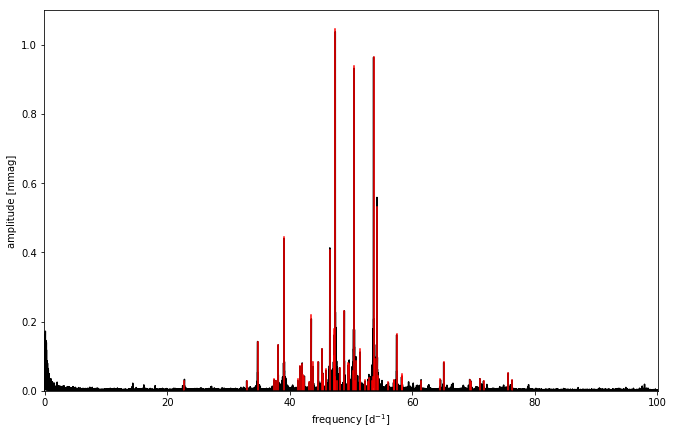

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.plot(freq, ampl*1000, c='k')

ax.stem(freqs[mask_freqs_big], ampls[mask_freqs_big]*1000, markerfmt=' ', basefmt='k', linefmt='r-')

#ax.setp(baseline, 'color', 'r', 'linewidth', 2)

ax.set_xlabel('frequency [d$^{-1}$]')
ax.set_ylabel('amplitude [mmag]')

ax.set_xlim(-0.1, 100.1)
ax.set_ylim(-0.001, 1.1)

plt.show()

In [196]:
import os

datadir = os.getcwd()

datafile = '/betaPic56_freqs.txt'

freqs, ampls = np.loadtxt(datadir + datafile, usecols=(1, 2)).T

In [200]:
mask_freqs_big = freqs > 3

In [1]:
freqs[mask_freqs_big]

NameError: name 'freqs' is not defined